In [1]:
import numpy as np
import matplotlib.pyplot as plt

from nd import LNN

In [73]:
Ns = np.round(np.linspace(100, 7000, 50)).astype('int')
eigenvalues = np.zeros((Ns.size, 100))
cosinesq = np.zeros((Ns.size, 100))
s = 0.01

In [165]:
Ns = np.round(np.linspace(100, 7000, 50)).astype('int')


In [74]:
for N_idx, N in enumerate(Ns):
    print(N_idx)
    lnn = LNN(kv=1, kw=N, N=N, sigmaC=0.01, sigmaP=0.01)
    fpr = 2 * s * lnn.v**2
    fpr_norm = np.sum(fpr**2)
    sigma = lnn.covariance_nonlinear_stage(s=s)
    u, v = np.linalg.eigh(sigma)
    eigenvalues[N_idx] = u[-100:]
    cosinesq[N_idx] = (np.dot(v.T, fpr)**2 / fpr_norm)[-100:]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [163]:
Ns = np.round(np.linspace(10, 5000, 2)).astype('int')
traces = np.zeros(Ns.size)
for N_idx, N in enumerate(Ns):
    lnn = LNN(kv=1, kw=3, N=N, sigmaC=0.01, sigmaP=0.01)
    sigma = lnn.covariance_nonlinear_stage(s=s)
    traces[N_idx] = np.trace(sigma)

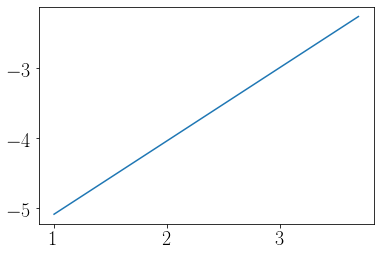

In [164]:
plt.plot(np.log10(Ns), np.log10(traces))

In [69]:
lnn = LNN(kv=1, kw=N, N=N, sigmaC=0.01, sigmaP=0.01)

In [72]:
lnn.covariance_nonlinear_stage(s=0.01)

array([[1.60000000e-07, 1.60000000e-07, 3.00000000e-07, ...,
        9.79720000e-01, 9.79999980e-01, 9.80280000e-01],
       [1.60000000e-07, 7.00000000e-07, 9.60000000e-07, ...,
        3.91832016e+00, 3.91944000e+00, 3.92056000e+00],
       [3.00000000e-07, 9.60000000e-07, 2.40000000e-06, ...,
        8.81580048e+00, 8.81832006e+00, 8.82084000e+00],
       ...,
       [9.79720000e-01, 3.91832016e+00, 8.81580048e+00, ...,
        4.79651474e+07, 4.79788547e+07, 4.79925659e+07],
       [9.79999980e-01, 3.91944000e+00, 8.81832006e+00, ...,
        4.79788547e+07, 4.79925698e+07, 4.80062829e+07],
       [9.80280000e-01, 3.92056000e+00, 8.82084000e+00, ...,
        4.79925659e+07, 4.80062829e+07, 4.80200039e+07]])

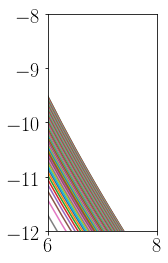

In [166]:
[plt.plot(np.log(Ns), np.log(cosinesq[:, i]))
for i in range(100)]
plt.xlim([6, 8])
plt.ylim([-12, -8])
plt.gca().set_aspect('equal')
plt.show()

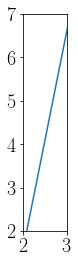

In [136]:
plt.plot(np.log10(Ns), np.log10(eigenvalues[:, -1]))
plt.xlim([2, 3])
plt.ylim([2, 7])
plt.gca().set_aspect('equal')


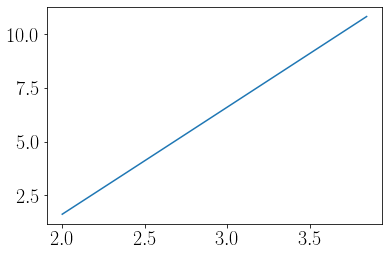

In [137]:
plt.plot(np.log10(Ns), np.log10(eigenvalues[:, -2]))

In [104]:
eigenvalues[]

array([4.60517019, 5.48479693, 5.94542061, 6.25766759, 6.49677499,
       6.68959927, 6.85118493, 6.9902565 , 7.11232744, 7.22037384,
       7.31853955, 7.40792432, 7.4899709 , 7.56579328, 7.63578686,
       7.70165236, 7.76344639, 7.82164313, 7.87663846, 7.92876632,
       7.97796809, 8.02518932, 8.07028089, 8.11342664, 8.15478757,
       8.1942293 , 8.23244016, 8.26924452, 8.30474227, 8.33902301,
       8.37193618, 8.40402449, 8.43511508, 8.46526812, 8.4945385 ,
       8.52297644, 8.55043453, 8.57734711, 8.60355436, 8.62909228,
       8.65399423, 8.67812086, 8.70184536, 8.72502004, 8.74766979,
       8.76981787, 8.79148603, 8.81254577, 8.83331694, 8.85366543])

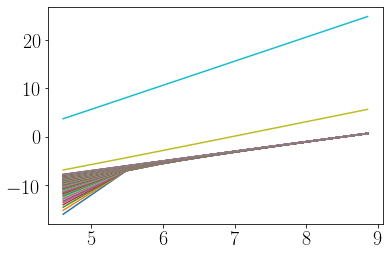

In [167]:
[plt.plot(np.log(Ns), np.log(eigenvalues[:, i]))
for i in range(100)]
#plt.xlim([6, 9])
#plt.ylim([-4, -1])
#plt.gca().set_aspect('equal')
plt.show()

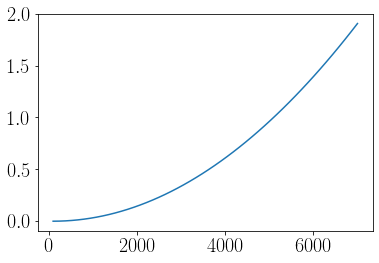

In [151]:
plt.plot(Ns, eigenvalues[:, 0])

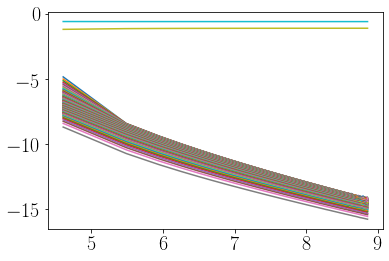

In [144]:
[plt.plot(np.log(Ns), np.log(cosinesq[:, i]))
for i in range(100)]
plt.show()

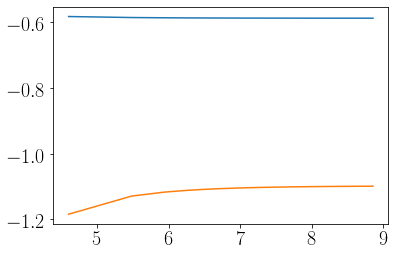

In [150]:
plt.plot(np.log(Ns), np.log(cosinesq[:, -1]))
plt.plot(np.log(Ns), np.log(cosinesq[:, -2]))

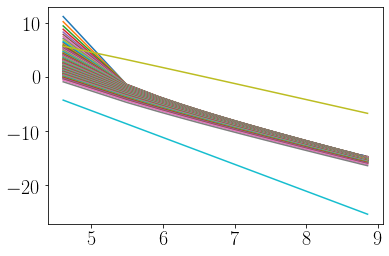

In [138]:
[plt.plot(np.log(Ns), np.log(cosinesq[:, i] / eigenvalues[:, i]))
for i in range(100)]
#plt.gca().set_aspect('equal')
plt.show()

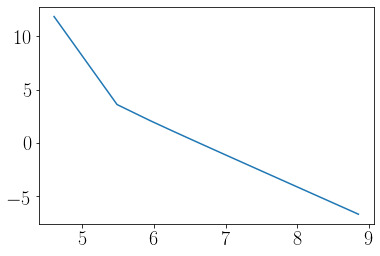

In [75]:
plt.plot(np.log(Ns), np.log(np.sum(cosinesq / eigenvalues, axis=1)))

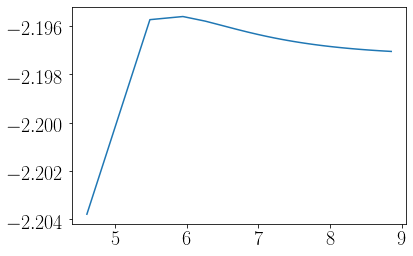

In [60]:
plt.plot(np.log(Ns), np.log(1 - np.sum(cosinesq[:, -19:], axis=1)))
#plt.plot([5, 9], [-2, -5])

In [ ]:
plt.plot(np.log(Ns), np.log(1 - np.sum(cosinesq[:, -2:], axis=1)))


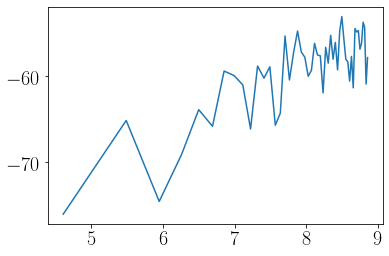

In [6]:
plt.plot(np.log(Ns), np.log(cosinesq[:, -3]))

[[<matplotlib.lines.Line2D at 0x1a18f7a410>],

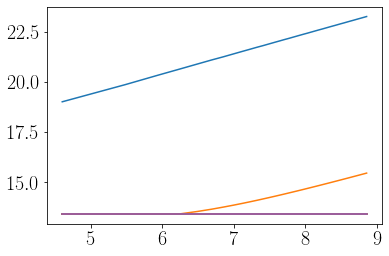

In [5]:
[plt.plot(np.log(Ns), np.log(eigenvalues[:, i]))
 for i in [-1, -2, -3, -4, -5]]

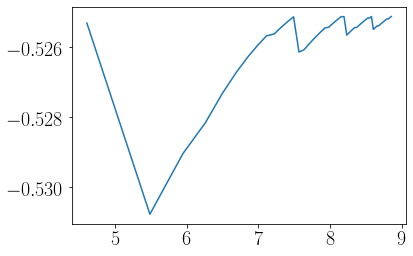

In [15]:
plt.plot(np.log(Ns), np.log(cosinesq[:, -1]))

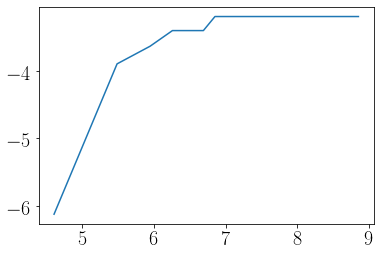

In [28]:
plt.plot(np.log(Ns), np.log(eigenvalues[:, 12]))

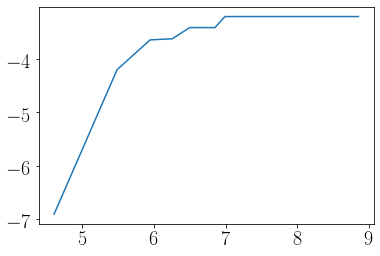

In [24]:
plt.plot(np.log(Ns), np.log(eigenvalues[:, 0]))

[[<matplotlib.lines.Line2D at 0x1a20550710>],

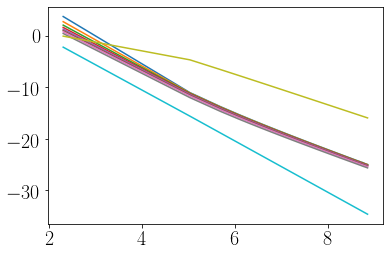

In [24]:
[plt.plot(np.log(Ns), np.log(cosinesq[:, i] / eigenvalues[:, i]))
 for i in range(10)]
#plt.gca().set_aspect('equal')

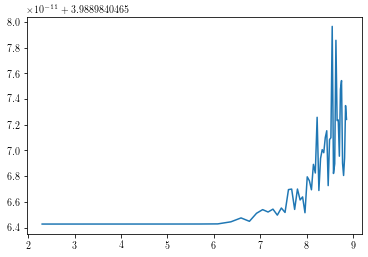

In [50]:
plt.plot(np.log(Ns), np.log(eigenvalues[:, -3]))

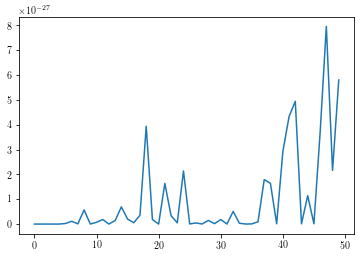

In [23]:
plt.plot(cosinesq[:, -4])

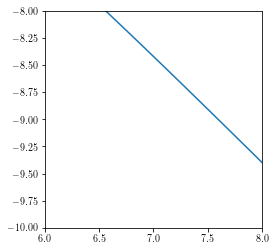

In [31]:
plt.plot(np.log(Ns), np.log(cosinesq[:, -2] / eigenvalues[:, -2]))
plt.xlim([6, 8])
plt.ylim([-10, -8])
#plt.xlim([1000, 7000])
#plt.ylim([1e-5, 1e-3])
plt.gca().set_aspect('equal')

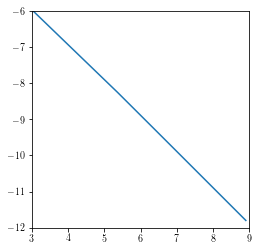

In [25]:
plt.plot(np.log(Ns[:37]), np.log(cosinesq[:37, -1] / eigenvalues[:37, -1]))
plt.ylim([-12, -6])
plt.xlim([3, 9])
plt.gca().set_aspect('equal')

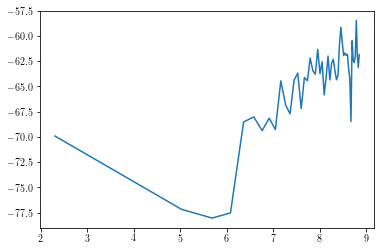

In [73]:
plt.plot(np.log(Ns), np.log(cosinesq[:, 0]))


In [68]:
plt.plot(np.log(Ns), np.log(eigenvalues[:, 0]))

array([3.09104245, 3.98898405, 3.98898405, 3.98898405, 3.98898405,
       3.98898405, 3.98898405, 3.98898405, 3.98898405, 3.98898405,
       3.98898405, 3.98898405, 3.98898405, 3.98898405, 3.98898405,
       3.98898405, 3.98898405, 3.98898405, 3.98898405, 3.98898405,
       3.98898405, 3.98898405, 3.98898405, 3.98898405, 3.98898405,
       3.98898405, 3.98898405, 3.98898405, 3.98898405, 3.98898405,
       3.98898405, 3.98898405, 3.98898405, 3.98898405, 3.98898405,
       3.98898405, 3.98898405, 3.98898405, 3.98898405, 3.98898405,
       3.98898405, 3.98898405, 3.98898405, 3.98898405, 3.98898405,
       3.98898405, 3.98898405, 3.98898405, 3.98898405, 3.98898405])

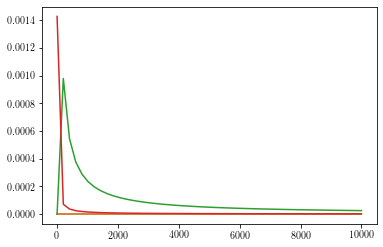

In [48]:
plt.plot(Ns, cosinesq[:, 0] / eigenvalues[:, 0])
plt.plot(Ns, cosinesq[:, 1] / eigenvalues[:, 1])
plt.plot(Ns, cosinesq[:, 2] / eigenvalues[:, 2])
plt.plot(Ns, cosinesq[:, 3] / eigenvalues[:, 3])

In [22]:
eigenvalues_4 = np.zeros((Ns.size, 4))
cosinesq_4 = np.zeros((Ns.size, 4))
s = 2

In [23]:
for N_idx, N in enumerate(Ns):
    print(N_idx)
    lnn = LNN(kv=1, kw=4, N=N, sigmaC=1., sigmaP=1.)
    fpr = 2 * s * lnn.v**2
    fpr_norm = np.sum(fpr**2)
    sigma = lnn.covariance_nonlinear_stage(s=s)
    u, v = np.linalg.eigh(sigma)
    eigenvalues_4[N_idx] = u[-4:]
    cosinesq_4[N_idx] = (np.dot(v.T, fpr)**2 / fpr_norm)[-4:]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


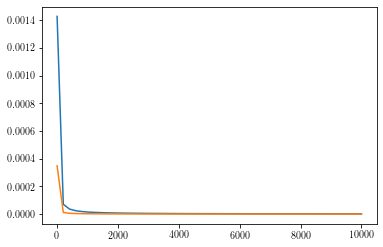

In [54]:
plt.plot(Ns, cosinesq[:, 3] / eigenvalues[:, 3])
plt.plot(Ns, cosinesq_4[:, 3] / eigenvalues_4[:, 3])

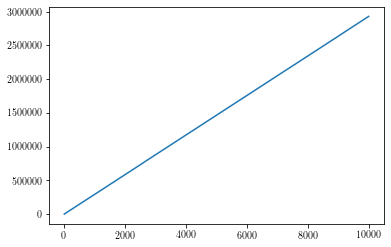

In [50]:
plt.plot(Ns, eigenvalues_4[:, 3])

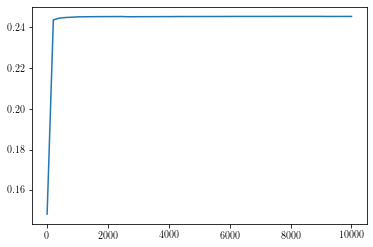

In [38]:
plt.plot(Ns, cosinesq_4[:, 2])